<a href="https://colab.research.google.com/github/KhuzaimaHassan/AI-and-ES/blob/main/Lab5AIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

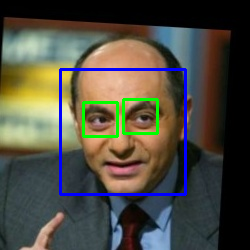

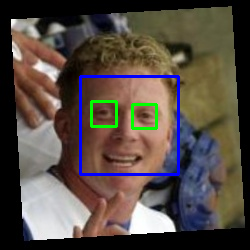

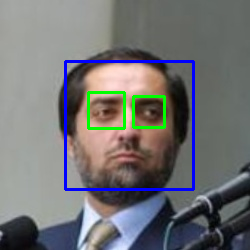

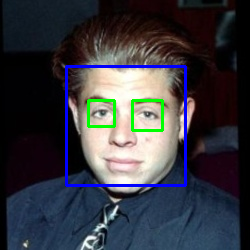

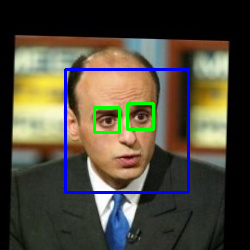

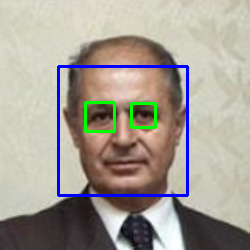

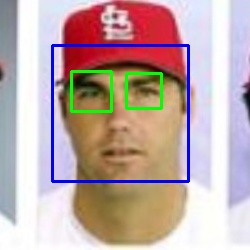

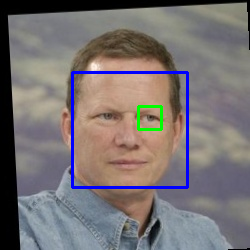

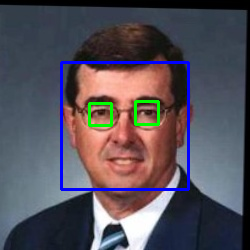

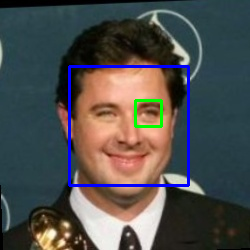

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

def detect_faces_and_eyes(image):
  if image is None:
    print("Error:Unable to read the image")
    return None
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
  return image

image_filenames = ['image0.jpg','image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg','image5.jpg','image6.jpg','image7.jpg','image8.jpg','image9.jpg']
results = []

for filename in image_filenames:
    image = cv2.imread(filename)
    result_image = detect_faces_and_eyes(image)
    if result_image is not None:
        cv2_imshow(result_image)
        results.append(result_image)
    else:
        print(f"Failed to process image {filename}")

In [ ]:
true_labels = [1,1,1,1,1,1,1,1,1,1]
predicted_labels = [1,1,1,1,1,1,1,0,1,0]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use your true positives, false positives, and false negatives here
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8
Precision: 1.0
Recall: 0.8
F1 Score: 0.8888888888888888
